# Early Stage Diabetes Risk Prediction Dataset - Kaggle

### Installing required dependencies

In [114]:
# !pip3 install -U scikit-learn scipy matplotlib

### Importing required dependencies

In [3]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

### Reading dataset file

In [4]:
df = pd.read_csv("diabetes_data.csv")

### Looking at dataset to assess the fields which need to be preprocessed

In [5]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


###  Standardizing and transforming required fields

In [118]:
# one_hot_encoded_gender = pd.get_dummies(df,columns=["Gender"])
# one_hot_encoded_gender

In [6]:
AgeScaler = StandardScaler().fit(df[["Age"]])
df[["Age"]] = AgeScaler.transform(df[["Age"]])
df["Gender"].replace(["Male","Female"],[1,0],inplace = True)
columns = df.columns.drop(["Age","class","Gender"])
df[columns] = df[columns].replace(["Yes","No"],[1,0])
df["class"].replace(["Positive","Negative"],[1,0],inplace=True)

### Looking at dataset after preprocessed steps done

In [7]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,-0.661367,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.821362,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.578993,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.249498,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.986110,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


<AxesSubplot:>

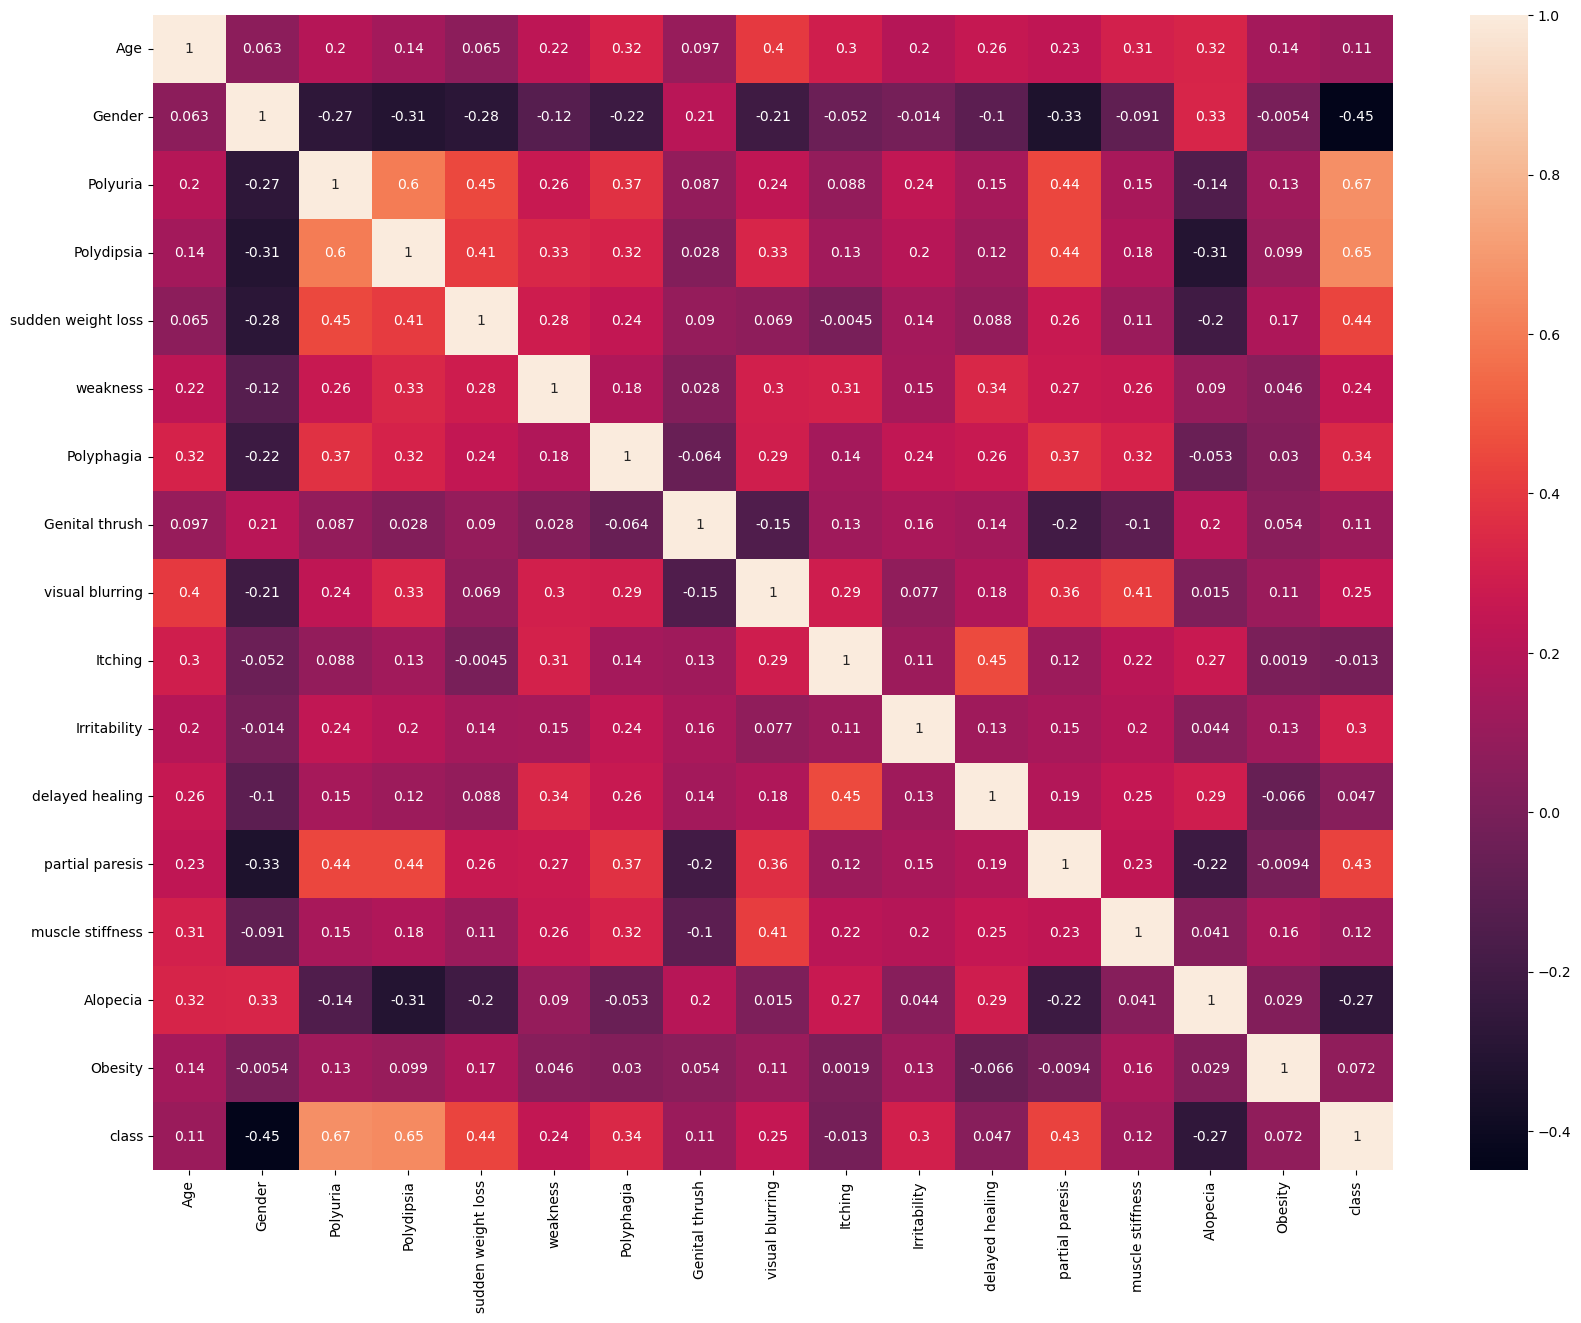

In [8]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

### Splitting Label with other fields

In [9]:
X = df.drop(columns = ["class"],axis = 1)
Y = df["class"]

### Attributes without Label

In [10]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,-0.661367,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,0.821362,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,-0.578993,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,-0.249498,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,0.986110,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


### Label

In [11]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

# Model Training

### Splitting training and testing data 

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, stratify = Y,random_state = 0)

### Fitting Decision Tree classifier

In [127]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

### Predicting Accuracy Score for training data

In [128]:
training_input_prediction = model.predict(X_train)
training_prediction_accuracy = accuracy_score(training_input_prediction,Y_train)
print("Training Prediction Accuracy:", training_prediction_accuracy)

Training Prediction Accuracy: 1.0


### Predicting Accuracy Score for testing data

In [129]:
testing_input_prediction = model.predict(X_test)
testing_prediction_accuracy = accuracy_score(testing_input_prediction,Y_test)
print("Testing Prediction Accuracy:", testing_prediction_accuracy)

Testing Prediction Accuracy: 0.967948717948718


### Saving Model and transformation using pickle

In [130]:
filename1 = "diabetes.sav" 
pickle.dump(model,open(filename1,"wb"))

filename2 = "ageScaler.sav"
pickle.dump(AgeScaler,open(filename2,"wb"))


### Fitting Logistic Regression Model. 

In [14]:
LogisticModel = LogisticRegression()
LogisticModel.fit(X_train,Y_train)

LogisticRegression()

### Predicting Accuracy Score for training data

In [20]:
confidence = LogisticModel.predict(X_test);
training_prediction_accuracy = accuracy_score(training_input_prediction,Y_train)
print("Training Prediction Accuracy:", training_prediction_accuracy)

Training Prediction Accuracy: 0.9423076923076923


### Saving Model and transformation using pickle

In [22]:
filename1 = "diabetes.sav" 
pickle.dump(LogisticModel,open(filename1,"wb"))

# Extras

In [131]:
temp = pickle.load(open(filename2, "rb"))


def transform_age(old_age):
    age_reshaped = np.asarray([[old_age]])
    new_age = temp.transform(age_reshaped)
    return new_age[0][0]


transform_age(16)


c:\Users\shiva\.conda\envs\machine_learning\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


-2.638339079732617